 ## 9. Groups in Geometry

 Some observations & definitions about groups; this section shows how such ideas may arise from geometric motions on segments, angle, and rays:

 - a group G "acts" on a set of elements X
 - an orbit is a set of all congruent results of G on elements x in X
 - a subgroup *fixing* x (Fx) leaves elements x fixed (isotropy group)
 - a coset maps 1 element in a group to all elements in another group
 - conjugate subgroups are isotropy subgroups in the same orbit

 > These observations, and many like them, indicate the very close relation between Euclidean geometry and group theory - so close that one might say that groups were implicit (though never explicit) in traditional geometry. For these reasons, it is clear that the basic ideas of a group theory belong early in the conceptual order of mathematical structures.

In [1]:
from geometry.identity import (
    GroupIdentity,
    Identity
)
from geometry.rigidMotion import (
    GroupEuclidean,
    GroupSpecialEuclidean,
    ProperRigidMotion,
    RigidMotion
)
from geometry.plane import Plane
from geometry.plot import plane_plot
from geometry.reflection import (
    GroupReflection,
    Reflection
)
from geometry.rotation import (
    GroupRotation,
    GroupRotationPoint,
    Rotation
)
from geometry.translation import (
    GroupTranslation,
    Translation
)
from random import choice
from sympy import (
    pi,
    Point,
    Segment,
    Triangle
)

In [2]:
H = GroupTranslation()
H

In [3]:
t = H.get_example()
t

Translation(
  x = -0.17472724258939243
  y = -0.5702873229132925
)

In [4]:
R = GroupRotation()
R

In [5]:
r = R.get_example()
r

Rotation(
  angle = 4.08892223844297
  point = Point2D(-0.627629615330455, -0.32053386006791)
)

In [6]:
L = GroupReflection()
L

In [7]:
l = L.get_example()
l

Reflection(
  line = Line2D(Point2D(0.0273930124167472, -0.995233233849063), Point2D(-0.190446132165906, -0.923856669631708))
)

In [8]:
A1 = Point(.4, .7)
B1 = Point(.6, .2)
C1 = Point(.4, .3)
ABC1 = Triangle(A1, B1, C1)

D1 = Point(0, .3)
E1 = Point(.6, .6)
s1 = Segment(D1, E1)

X = Plane(ABC1, s1)
X

Segment2D(Point2D(0, 3/10), Point2D(3/5, 3/5)) Triangle(Point2D(2/5, 7/10), Point2D(3/5, 1/5), Point2D(2/5, 3/10))

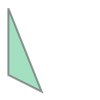

In [9]:
x = choice(X)
x

In [10]:
E0 = GroupSpecialEuclidean()
E0

In [11]:
g1 = E0.get_example()
g1

ProperRigidMotion(
  Rotation(
  angle = 0.826437537270933
  point = Point2D(0.160604360052495, 0.00874507092601684)
)
  Translation(
  x = 0.23455039125327826
  y = 0.7891015126261767
)
)

In [12]:
g1 + 1

ProperRigidMotion(
  Rotation(
  angle = 0.826437537270933
  point = Point2D(0.160604360052495, 0.00874507092601684)
)
  Translation(
  x = 0.23455039125327826
  y = 0.7891015126261767
)
)

In [13]:
g2 = E0.get_example()
g2

ProperRigidMotion(
  Rotation(
  angle = 5.51972619921493
  point = Point2D(-0.409894631520636, -0.664374396769526)
)
  Translation(
  x = 0.4162287756160792
  y = 0.5554923887354086
)
)

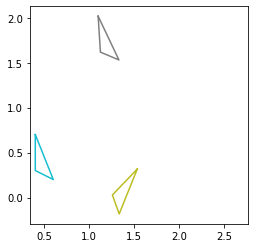

In [14]:
p1 = Plane(x)
p2 = g2.act(p1)
p3 = g1.act(p2)
plane_plot(p1, p2, p3)

In [15]:
g3 = (g1 + g2)
g3

ProperRigidMotion(
  Rotation(
  angle = 6.34616373648586
  point = Point2D(9.54095074237767, 4.5922661779776)
)
  Translation(
  x = 0.6507791668693574
  y = 1.3445939013615853
)
)

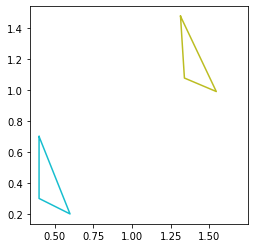

In [16]:
p4 = g3.act(p1)
plane_plot(p1, p4)

In [17]:
x = Point(2, 4)
Fx = GroupRotationPoint(x)

y = Point(1, -3)
Fz = GroupRotationPoint(y)

Fx.is_isomorphic(Fz)

True

In [18]:
t1 = Translation(-1, -7)
TR = ProperRigidMotion(Fx.get_rotation(ang = 3), t1)
TR

ProperRigidMotion(
  Rotation(
  angle = 3
  point = Point2D(2, 4)
)
  Translation(
  x = -1
  y = -7
)
)

In [19]:
class coset:

    def __init__(self, R: GroupRotationPoint):
        self.T = GroupTranslation()
        self.R = R

    def get_example(self):
        rotation = self.R.get_example()
        return ProperRigidMotion(rotation, self.T.get_example())


TFx = coset(Fx)
TFx.get_example()

ProperRigidMotion(
  Rotation(
  angle = 5.00815520357343
  point = Point2D(2, 4)
)
  Translation(
  x = 0.2360022887873483
  y = -0.837818373398244
)
)

In [20]:
E0.get_identity()

Identity

In [21]:
h = E0.get_example()
h

ProperRigidMotion(
  Rotation(
  angle = 5.57340973395934
  point = Point2D(0.942947143302412, 0.69310564638144)
)
  Translation(
  x = 0.2657758036427793
  y = 0.6030437224309249
)
)

In [22]:
p5 = Plane(x)
hx = h.act(p5)[0]
hx.evalf()

Point2D(4.16548868939670, 3.11561284800398)

In [23]:
k = E0.get_example()
kx = k.act(p5)[0]
kx.evalf()

Point2D(-4.60588080819825, -0.0948945326114297)

In [24]:
hx.equals(kx)

False

In [25]:
k_inv = h.inverse()
k_inv

ProperRigidMotion(
  Rotation(
  angle = -5.57340973395934
  point = Point2D(120872294694519/100000000000000, 129614936881237/100000000000000)
)
  Translation(
  x = -0.2657758036427793
  y = -0.6030437224309249
)
)

In [26]:
kx_inv = k_inv.act(p5)[0]
kx_inv.evalf()

Point2D(-0.218863688667989, 3.25964479495898)

In [27]:
k_inv_h = (h + k_inv)
k_inv_h

ProperRigidMotion(
  Rotation(
  angle = 0
  point = Point2D(0, 0)
)
  Translation(
  x = 0.0
  y = 0.0
)
)

In [28]:
x_p = k_inv_h.act(p5)[0]
x_p

Point2D(2, 4)

In [29]:
Fx.contains(x_p)

True

In [30]:
x

Point2D(2, 4)

In [31]:
y = h.act(p5)[0]
y.evalf()

Point2D(4.16548868939670, 3.11561284800398)

In [32]:
p6 = Plane(y)
h_inv = h.inverse().act(p6)[0]
h_inv.evalf()

Point2D(2.00000000000000, 4.00000000000000)

In [33]:
Fx.is_equal(GroupRotationPoint(h_inv))

True

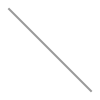

In [34]:
p_A = Point(-.2, .7)
p_B = Point(.2, .3)
AB = Segment(p_A, p_B)
AB

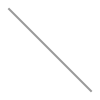

In [35]:
def rgm_I(s):
    m = ProperRigidMotion(Rotation(0, Point(0, 0)), Translation(0, 0))
    return m.act(Plane(s))[0]

rgm_I(AB)

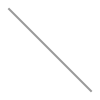

In [36]:
def rgm_L(s):
    m = RigidMotion(Rotation(0, Point(0, 0)), Translation(0, 0), Reflection(s))
    return m.act(Plane(s))[0]

rgm_L(AB)

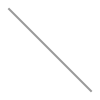

In [37]:
def rgm_R(s):
    m = ProperRigidMotion(Rotation(pi, s.midpoint), Translation(0, 0))
    return m.act(Plane(s))[0]

rgm_R(AB)

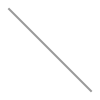

In [38]:
def rgm_LR(s):
    m = RigidMotion(Rotation(pi, s.midpoint), Translation(0, 0), Reflection(s))
    return m.act(Plane(s))[0]

rgm_LR(AB)

In [39]:
E = GroupEuclidean()
E

In [40]:
E.overgroup_of(E0)

True

In [41]:
E0.overgroup_of(H)

True

In [42]:
Id = GroupIdentity()
Id

In [43]:
H.overgroup_of(Id)

True

In [44]:
E.overgroup_of(Id)

True

In [69]:
class Orientation:
    
    o = [True, False]

    def _get_latex(self, direction):
        if direction:
            return r"\uparrow"
        else:
            return r"\downarrow"

    def _repr_latex_(self):
        a = self._get_latex(self.o[0])
        b = self._get_latex(self.o[1])
        return "$\{" + a + "," + b + "\}$"

    def __add__(self, o2):
        if self.o != o2.o:
            self.o.reverse()
        return self


O = Orientation()
O

In [70]:
class PlaneOriented:
    """ The permutation operation on orientations of the plane. """

    O = Orientation()

    def _repr_latex_(self):
        return "$\sigma$"
    
    def sigma(self, M):
        """ M is a motion. """
        if isinstance(M, Reflection):
            self.O.o.reverse()
        return self.O


po = PlaneOriented()
po

In [71]:
h1 = H.get_example()
po.sigma(h1)

In [72]:
l1 = L.get_example()
po.sigma(l1)

In [73]:
po.sigma(l1)

In [74]:
M_prm = E0.get_example()
po.sigma(M_prm)

In [75]:
M_rm = E.get_example()
po.sigma(M_rm)

In [76]:
h2 = H.get_example()
po.sigma(h1 + h2)

In [77]:
po.sigma(h1) + po.sigma(h2)

In [78]:
l2 = L.get_example()
po.sigma(l1 + l2)

In [79]:
po.sigma(l1) + po.sigma(l2)